In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

In [2]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Raw Data

In [13]:
df_15 = pd.read_csv('./data/2015.csv')

## Formatting

In [14]:
df_15['Call Received'] = pd.to_datetime(df_15['Call Received'])

In [ ]:
#data.info()

In [15]:
#rename
#df_15 = df_15.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitiude':'long','Mapped Location':'map_loc'}, axis=1)

In [16]:
#df_15['month'] = pd.DatetimeIndex(df_15['call_re']).month
#df_15['day'] = pd.DatetimeIndex(df_15['call_re']).day

In [17]:
#to avoid having to recreate and reload info
#df_15 = df_15.to_csv('./data/df_2015_formatted.csv', index = False)

## Load Formatted Data

In [20]:
df_15 = pd.read_csv('./data/df_2015_formatted.csv')

In [25]:
df_15['call_re'] = pd.to_datetime(df_15['call_re'])

## Stats

In [26]:
df_15.head()

,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day
0,PD201500000002,2015-01-01,20150000002,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,900.0,GALLATIN AV,227C,E,27.0,1927.0,36.186,-86.748,"(36.186, -86.748)",1,1
1,PD201500000003,2015-01-01,20150000003,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,700.0,MAIN ST,213C,E,11.0,1119.0,36.175,-86.761,"(36.175, -86.761)",1,1
2,PD201500000005,2015-01-01,20150000005,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,0.0,WHITE BRIDGE PKE,117C,W,13.0,5107.0,36.129,-86.849,"(36.129, -86.849)",1,1
3,PD201500000006,2015-01-01,20150000006,C,94,Personal Relief,NaN,NaN,4,ASSISTED CITIZEN,1100.0,CRYSTAL SPRING LN,5F17,H,21.0,9529.0,36.174,-86.611,"(36.174, -86.611)",1,1
4,PD201500000007,2015-01-01,20150000011,C,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,500.0,BROADWAY,NaN,C,21.0,4089.0,36.160,-86.779,"(36.16, -86.779)",1,1


## Worst Days & Weeks

Text(0, 0.5, 'Number of Incidents')

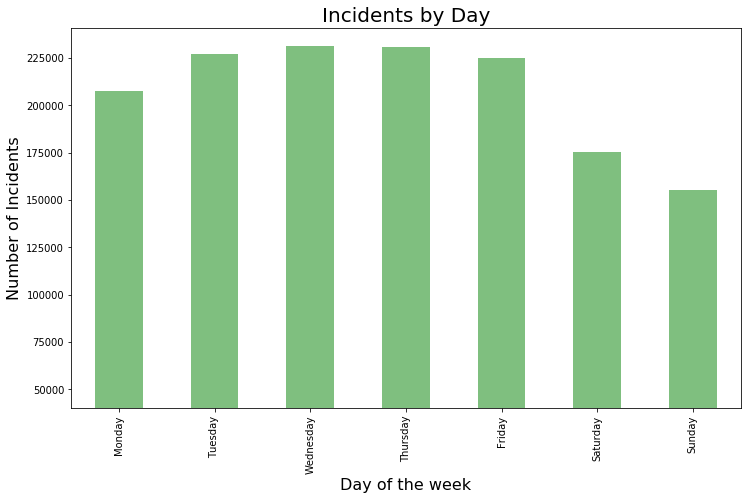

In [27]:
# Number of scooter per day of the week
day_incidents = df_15.groupby(df_15['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

In [29]:
# Number of scooter per day of the week
wk_incidents = df_15.groupby(df_15['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     11388
2     25555
3     24050
4     24598
5     23211
6     24384
7     24504
8     20260
9     24352
10    22208
11    23882
12    22517
13    23861
14    22702
15    22978
16    24631
17    24636
18    23309
19    24788
20    23982
21    23579
22    24570
23    25674
24    25331
25    25094
26    24557
27    22946
28    21658
29    21635
30    21100
31    20927
32    21292
33    21649
34    22809
35    22159
36    21780
37    20487
38    21201
39    21830
40    20993
41    21093
42    20638
43    20723
44    20543
45    20472
46    21181
47    21619
48    19982
49    20752
50    21928
51    22538
52    16226
53    11376
Name: call_re, dtype: int64


In [30]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [32]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,11388
2,2,25555
3,3,24050
4,4,24598
5,5,23211
6,6,24384
7,7,24504
8,8,20260
9,9,24352
10,10,22208


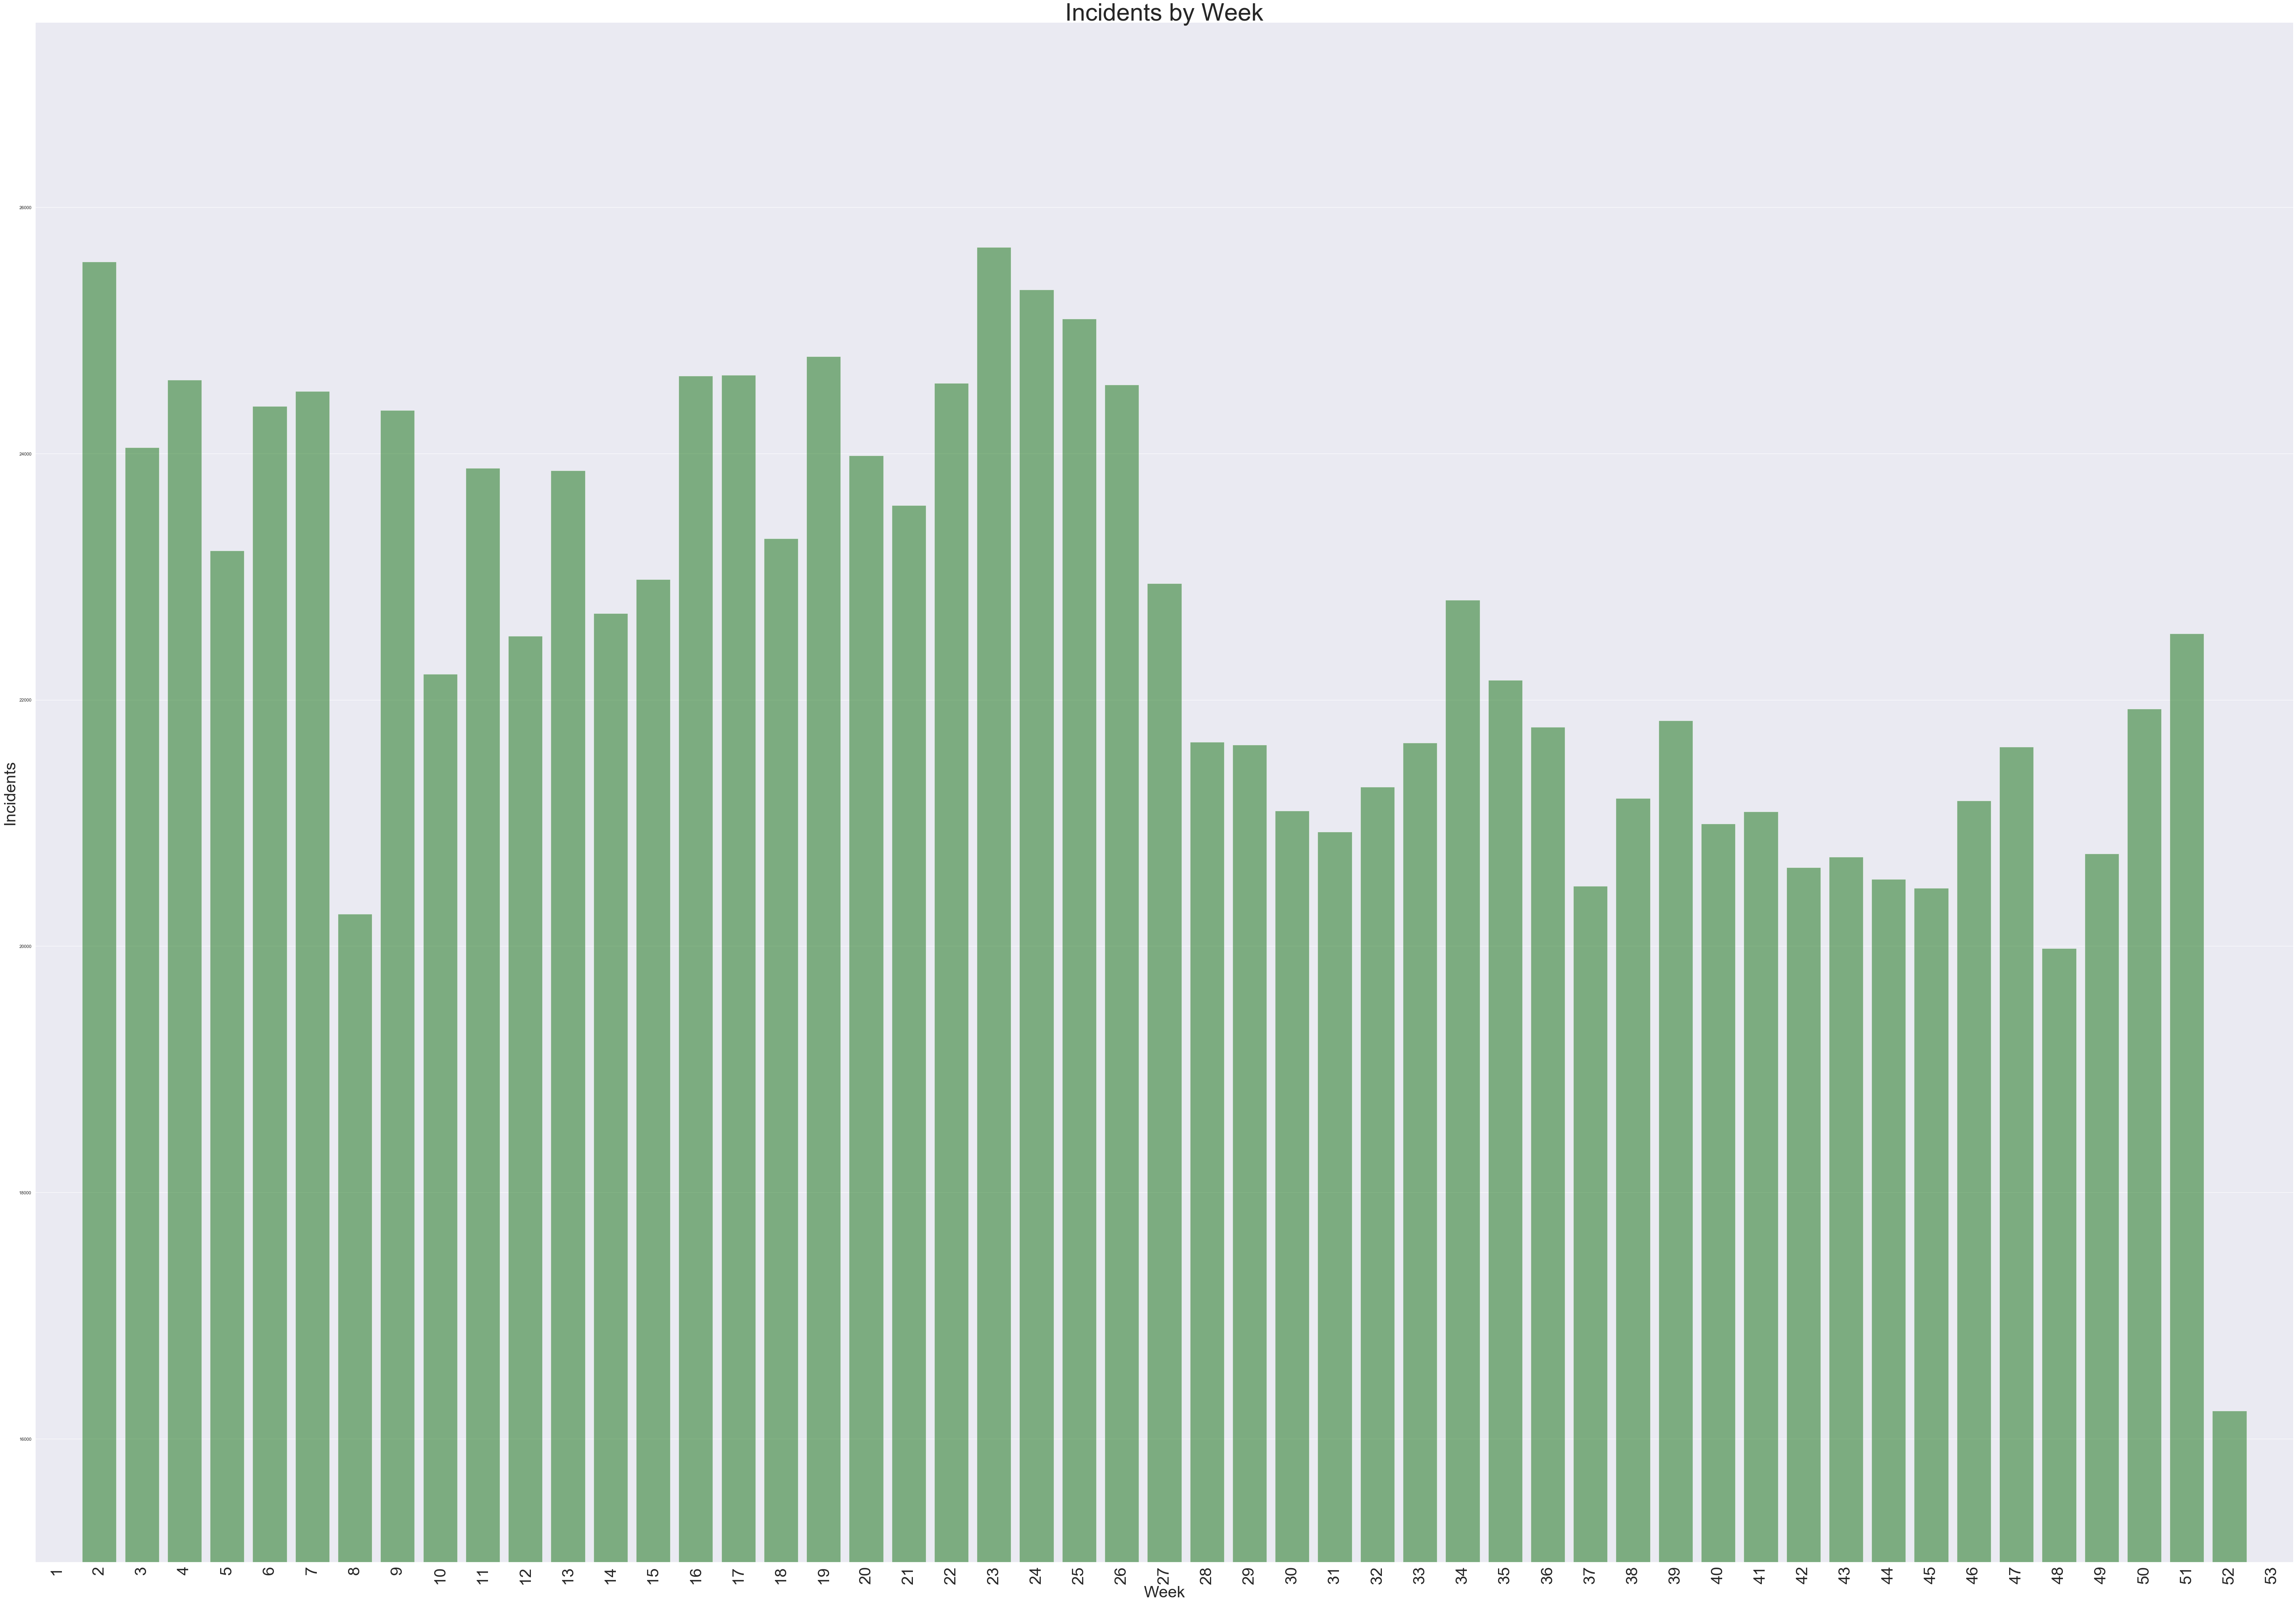

In [35]:
plt.ylim(15000, 27500)

g = sns.barplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90,fontsize = 40)
sns.set(rc={'figure.figsize':(100,70)})
plt.title("Incidents by Week", fontsize = 60)
plt.xlabel("Week", fontsize = 40)
plt.ylabel("Incidents", fontsize = 40)
plt.show()

Text(0, 0.5, 'Number of Incidents')

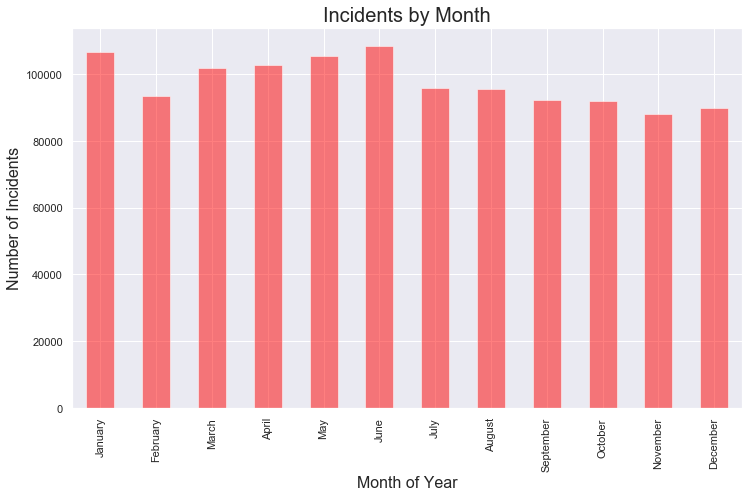

In [37]:
# Number of incidents per Month
mth_incidents = df_15.groupby(df_15['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5, bottom = 0)

# title and x,y labels
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Worst Day of Week = Wednesday 
\ Worst Week of Year = 1 
\ Worst Month of Year = January 

## Incidents Reported

In [38]:
inc_ct = df_15.tc_desc.value_counts()

In [39]:
inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [40]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

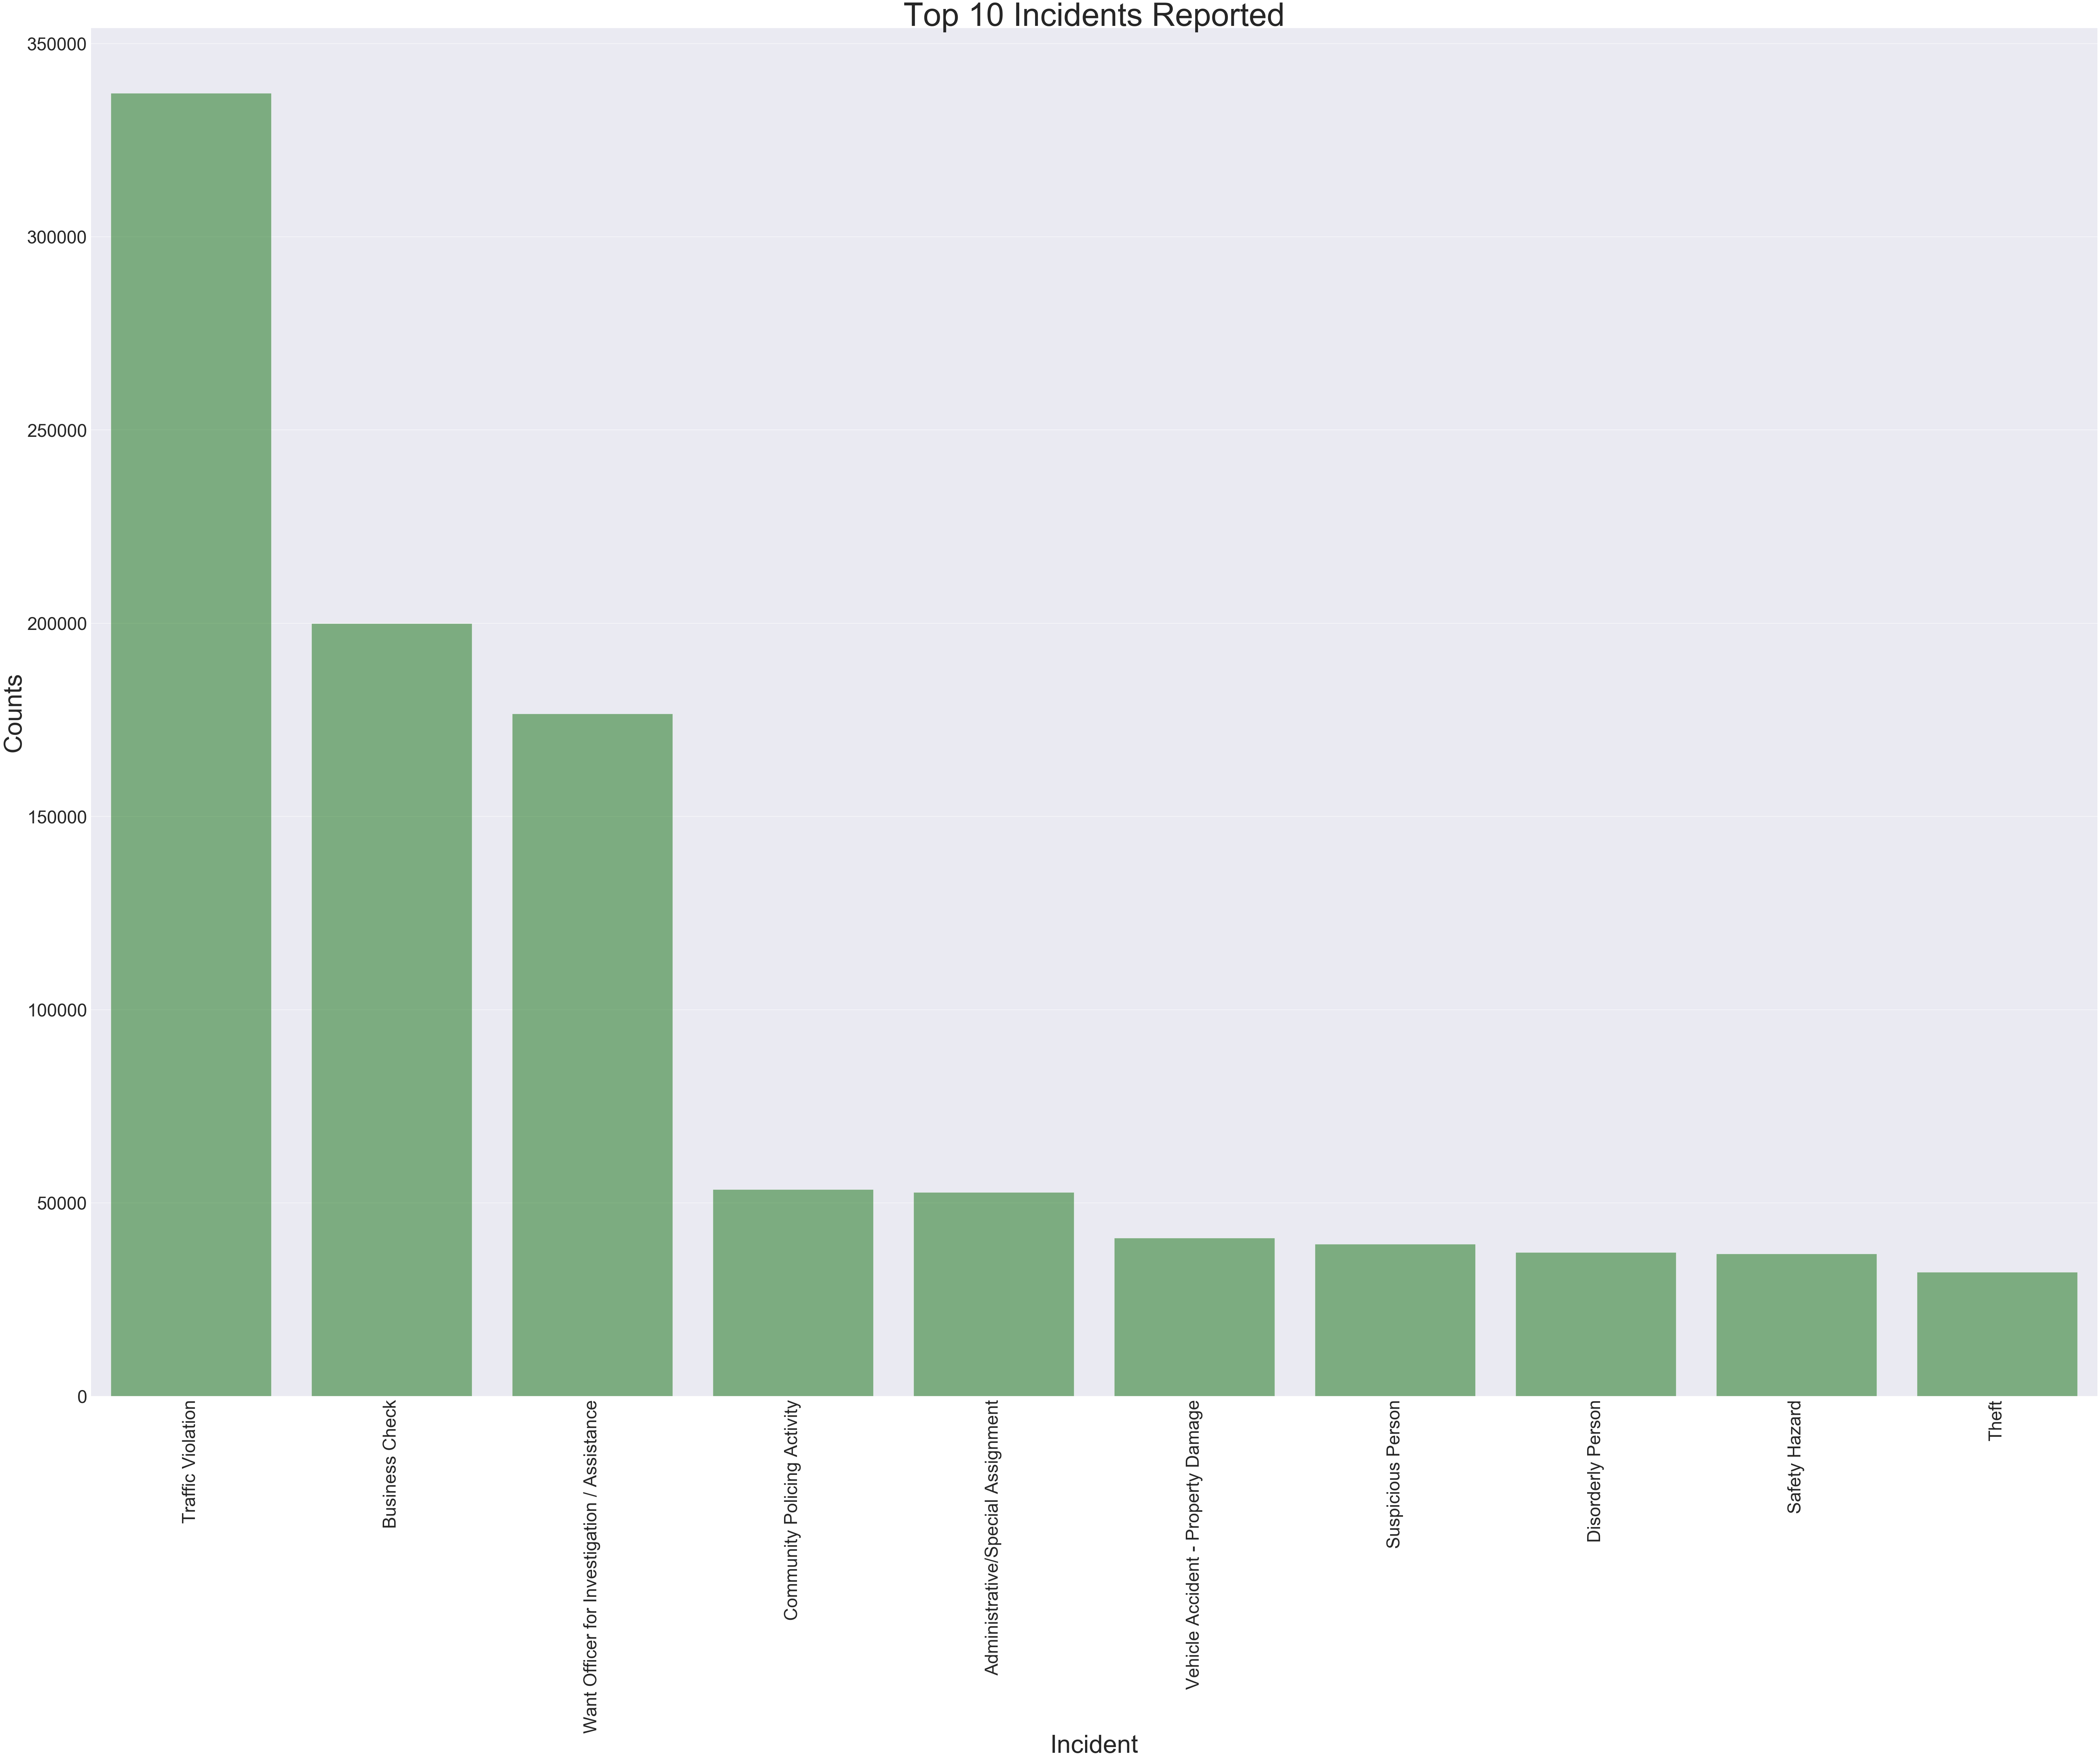

In [41]:

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Top 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [42]:
# Smallest x number of incidents

s25 = inc_cts.nsmallest(10,['Count'])

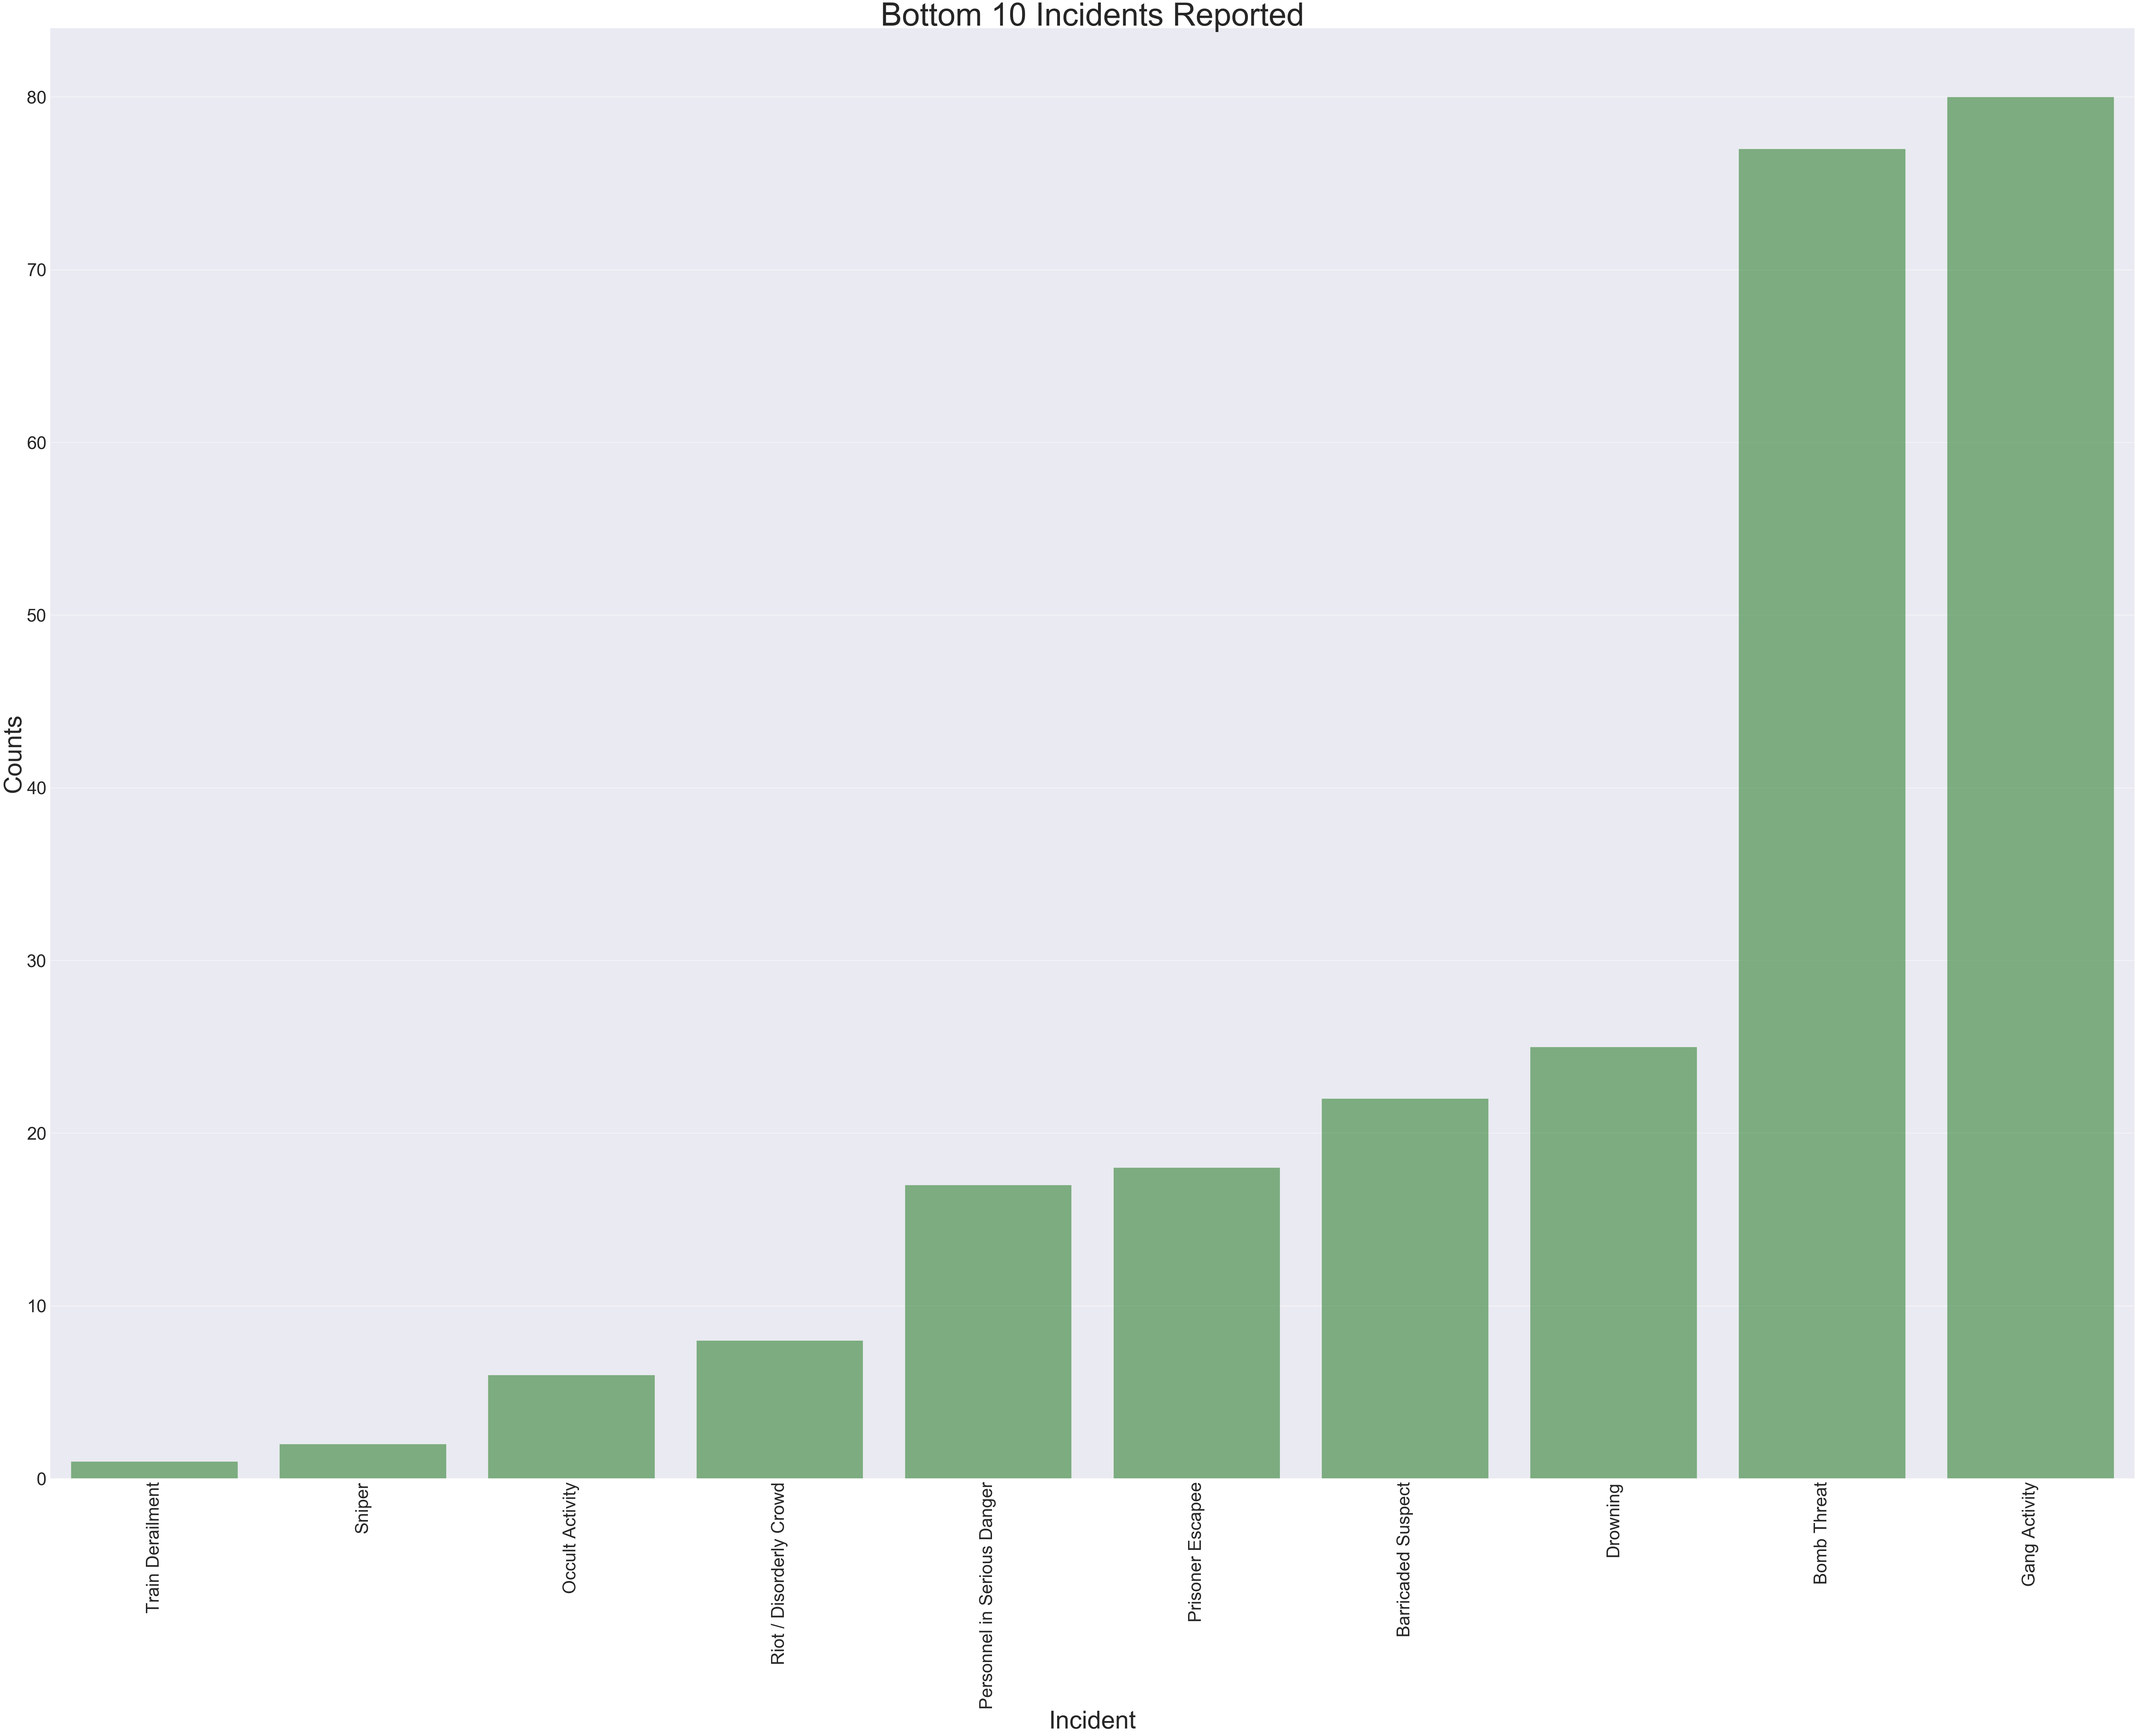

In [43]:

g = sns.barplot(x = "Incident",y = "Count", data = s25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [ ]:
# Top Ten Incidents by Month

## Mapping